In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


# Paper 1 Benchmark

In [ ]:
import pandas as pd
df_eval= pd.read_csv('/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Results/Paper 1/p1_400q_eval_results.csv')

In [ ]:
df_eval.columns

Index(['Raw question', 'Formatted Question and Markscheme',
       'Formatted Question', 'Markscheme', 'gpt-4 Answer',
       'gpt-3.5-turbo Answer', 'RAG gpt-4 Answer', 'RAG gpt-3.5-turbo Answer',
       'Vanilla Mistral Answer', 'Fine Tuned Mistral Answer',
       'Vanilla Biomistral DARE Answer', 'Fine Tuned Biomistral DARE Answer'],
      dtype='object')

In [ ]:
import pandas as pd

# Function to calculate the correctness percentage
def calculate_correctness(df, answer_column, markscheme_column):
    correct_count = (df[answer_column] == df[markscheme_column]).sum()
    total_count = len(df)
    percentage_correct = (correct_count / total_count) * 100
    return percentage_correct

# Columns with model answers
model_answer_columns = [
    'gpt-4 Answer',
    'gpt-3.5-turbo Answer',
    'Vanilla Mistral Answer',
    'Fine Tuned Mistral Answer',
    'RAG gpt-4 Answer',
    'RAG gpt-3.5-turbo Answer',
    'Vanilla Biomistral DARE Answer',
    'Fine Tuned Biomistral DARE Answer'
]


# Calculate correctness for each model
correctness_percentages = {model_answer: calculate_correctness(df_eval, model_answer, 'Markscheme') for model_answer in model_answer_columns}

# Sort the dictionary by values (correctness percentages) in descending order
sorted_correctness_percentages = {k: v for k, v in sorted(correctness_percentages.items(), key=lambda item: item[1], reverse=True)}

print("Percentage Score's for each model on 400 Paper 1 questions:\n")
# Print sorted correctness percentages
for model_answer, percentage_correct in sorted_correctness_percentages.items():
    print(f"{model_answer}: {percentage_correct:.2f}%")


Percentage Score's for each model on 400 Paper 1 questions:

RAG gpt-4 Answer: 90.49%
gpt-4 Answer: 88.50%
gpt-3.5-turbo Answer: 75.66%
RAG gpt-3.5-turbo Answer: 74.78%
Fine Tuned Biomistral DARE Answer: 60.62%
Vanilla Biomistral DARE Answer: 58.63%
Vanilla Mistral Answer: 55.97%
Fine Tuned Mistral Answer: 55.97%


# Qualitative benchmark

## Format data frames

In [ ]:
import pandas as pd
vanilla_gpt_4=pd.read_csv('/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Results/qualitative_data_questions/vanilla_gpt_4.csv').drop(columns=['Unnamed: 0'])
vanilla_gpt_35_turbo=pd.read_csv('/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Results/qualitative_data_questions/vanilla_gpt_35_turbo.csv').drop(columns=['Unnamed: 0'])
rag_gpt_4=pd.read_csv('/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Results/qualitative_data_questions/rag_gpt_4.csv').drop(columns=['Unnamed: 0'])
rag_gpt_35_turbo=pd.read_csv('/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Results/qualitative_data_questions/rag_gpt_35_turbo.csv').drop(columns=['Unnamed: 0'])
vanilla_mistral=pd.read_csv('/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Results/qualitative_data_questions/vanilla_mistral.csv').drop(columns=['Unnamed: 0'])
ft_mistral=pd.read_csv('/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Results/qualitative_data_questions/ft_mistral.csv').drop(columns=['Unnamed: 0'])
vanilla_biomistral_dare=pd.read_csv('/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Results/qualitative_data_questions/vanilla_biomistral_dare.csv').drop(columns=['Unnamed: 0'])
ft_biomistral_dare=pd.read_csv('/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Results/qualitative_data_questions/ft_biomistral.csv').drop(columns=['Unnamed: 0'])



In [ ]:
vanilla_gpt_4.columns

Index(['Qualitative benchmark question', 'Markscheme', 'gpt-4 Answer',
       'gpt-4 input tokens', 'gpt-4 output tokens', 'gpt-4 time taken'],
      dtype='object')

In [ ]:
import pandas as pd

# List of all dataframes
dataframes = [vanilla_gpt_4, vanilla_gpt_35_turbo, rag_gpt_4, rag_gpt_35_turbo,
              vanilla_mistral, ft_mistral, vanilla_biomistral_dare, ft_biomistral_dare]

# Function to select specific columns based on keyword and concatenate horizontally
def create_dataset(dfs, keyword):
    # Start with an empty dataframe with just the 'Qualitative benchmark question' and 'Markscheme'
    df_ = pd.DataFrame(data=dataframes[0][['Qualitative benchmark question', 'Markscheme']])
    # Extract and concatenate the relevant columns horizontally
    for df in dfs:

        # Find the column that contains the keyword
        column_name = [col for col in df.columns if keyword in col]
        if column_name[0] in ['input tokens','output tokens']:
            df[column_name[0]]=df[column_name[0]].astype(int)
            df_[column_name[0]]=df[column_name[0]]
        elif column_name[0] == 'time taken':
            df[column_name[0]]=df[column_name[0]].astype(float)
            df_[column_name[0]]=df[column_name[0]]
        else:
            df_[column_name[0]]=df[column_name[0]]
    return df_

# Creating datasets
ds_responses = create_dataset(dataframes, 'Answer')
ds_input_tokens = create_dataset(dataframes, 'input tokens')
ds_output_tokens = create_dataset(dataframes, 'output tokens')
ds_time_taken = create_dataset(dataframes, 'time taken')


In [ ]:
responses_path="/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Results/qualitative_data_questions/concat_dfs/model_responses.csv"
input_tokens_path="/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Results/qualitative_data_questions/concat_dfs/input_tokens.csv"
output_tokens_path="/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Results/qualitative_data_questions/concat_dfs/output_tokens.csv"
time_taken_path="/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Results/qualitative_data_questions/concat_dfs/time_taken.csv"

ds_responses.to_csv(responses_path, index=False)
ds_input_tokens.to_csv(input_tokens_path, index=False)
ds_output_tokens.to_csv(output_tokens_path, index=False)
ds_time_taken.to_csv(time_taken_path, index=False)

## Chatbot Arena ELO calculation results

In [ ]:
import pandas as pd
path="/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Results/Chatbot_Arena_Data/gpt 4/gpt_4_match_up_results.csv"

gpt_4_eval_df=pd.read_csv(path)

In [ ]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm

initial_elo = 1400
K = 16
n_perm = 1000  # Number of permutations/ bootstrap samples


def update_elo(rating_a, rating_b, score_a, score_b, K):
    expected_a = 1 / (1 + 10 ** ((rating_b - rating_a) / 400))
    expected_b = 1 - expected_a
    new_rating_a = rating_a + K * (score_a - expected_a)
    new_rating_b = rating_b + K * (score_b - expected_b)
    return new_rating_a, new_rating_b


def calculate_elo_ratings(dataframe, K, initial_elo):
    models = set(dataframe['Model 1']) | set(dataframe['Model 2'])
    elo_ratings = {model: initial_elo for model in models}
    for index, row in dataframe.iterrows():
        model_1, model_2 = row['Model 1'], row['Model 2']
        score_a = row['Win']
        if score_a==1:
            score_b=0
        else:
            if row['Tie']==1:
                score_a=0.5
                score_b=0.5
            else:
                score_b=1
        new_rating_1, new_rating_2 = update_elo(elo_ratings[model_1], elo_ratings[model_2], score_a, score_b, K)
        elo_ratings[model_1], elo_ratings[model_2] = new_rating_1, new_rating_2
    return elo_ratings

models= [model for model in set(list(gpt_4_eval_df['Model 1'].unique())+list(gpt_4_eval_df['Model 2'].unique()))]
# Bootstrapping
elo_samples = {model: [] for model in models}
for index,_ in tqdm(enumerate(range(n_perm)),total=n_perm,position=0, leave=True):
    sample_df = gpt_4_eval_df.sample(frac=1, replace=True, random_state=index)
    sample_elo_ratings = calculate_elo_ratings(sample_df, K, initial_elo)
    for model, rating in sample_elo_ratings.items():
        elo_samples[model].append(rating)

# Calculating the 95% confidence interval for each model
confidence_intervals = {model: np.percentile(elo_samples[model], [2.5, 97.5]) for model in models}

# Print the results
# Calculate the average Elo rating for each model
average_elos = {model: np.mean(elo_samples[model]) for model in models}

# Sort models by their average Elo rating in descending order
sorted_models = sorted(average_elos.items(), key=lambda item: item[1], reverse=True)

print("\n\n")
# Display the sorted and ranked models with their confidence intervals
print("Sorted and ranked models with Elo ratings and confidence intervals:")
for rank, (model, elo) in enumerate(sorted_models, start=1):
    interval = confidence_intervals[model]
    print(f"{rank}. {model}: Elo = {elo:.0f}, CI = [{interval[0]:.0f}, {interval[1]:.0f}]")



100%|██████████| 1000/1000 [01:15<00:00, 13.22it/s]




Sorted and ranked models with Elo ratings and confidence intervals:
1. RAG gpt-4 Answer: Elo = 1765, CI = [1704, 1824]
2. RAG gpt-3.5-turbo Answer: Elo = 1648, CI = [1593, 1703]
3. gpt-4 Answer: Elo = 1580, CI = [1526, 1633]
4. gpt-3.5-turbo Answer: Elo = 1380, CI = [1322, 1441]
5. Fine Tuned Mistral Answer: Elo = 1288, CI = [1226, 1347]
6. Fine Tuned Biomistral DARE Answer: Elo = 1255, CI = [1200, 1312]
7. Vanilla Biomistral DARE Answer: Elo = 1184, CI = [1130, 1243]
8. Vanilla Mistral Answer: Elo = 1100, CI = [1042, 1164]


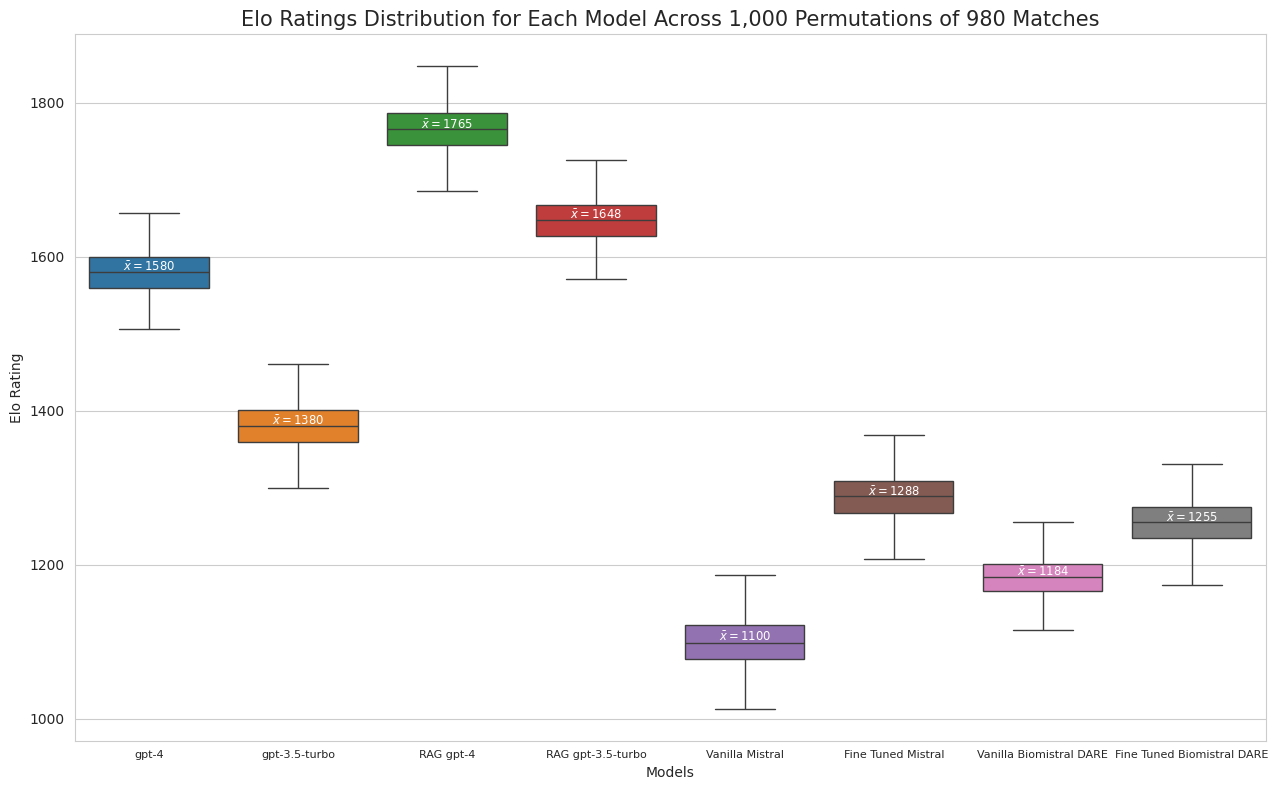

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

elo_df = pd.DataFrame(elo_samples)

# Define the specific order of models as per your requirement
ordered_columns = [
    'gpt-4 Answer',
    'gpt-3.5-turbo Answer',
    'RAG gpt-4 Answer',
    'RAG gpt-3.5-turbo Answer',
    'Vanilla Mistral Answer',
    'Fine Tuned Mistral Answer',
    'Vanilla Biomistral DARE Answer',
    'Fine Tuned Biomistral DARE Answer'
]

# Ensure all your required columns are actually in the DataFrame and reorder them
elo_df = elo_df[[col for col in ordered_columns if col in elo_df.columns]]
elo_df.columns = [col.replace(' Answer', '') for col in elo_df.columns]

# Calculate the mean Elo ratings for each model (rounded to whole numbers)
mean_elos = elo_df.mean().round().astype(int)

# Plotting the boxplot
#plt.figure(figsize=(13, 8))
plt.figure(figsize=(13, 8))

sns.boxplot(data=elo_df, showfliers=False)#,width=0.5)
plt.title('Elo Ratings Distribution for Each Model Across 1,000 Permutations of 980 Matches', fontsize=15)
plt.ylabel('Elo Rating')
plt.xlabel('Models')
plt.xticks(rotation=0, fontsize=8)

# Annotate each box with the mean Elo rating
ax = plt.gca()
for i, mean in enumerate(mean_elos):
    ax.text(i, mean +1, r'$\bar{x}=' + f"{mean}$", horizontalalignment='center', size='small', color='White')#, weight='semibold')

plt.tight_layout()
plt.show()



## Responses to qualitative benchmark questions Results

### Example matchups results

In [ ]:
import pandas as pd
path="/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Results/Chatbot_Arena_Data/gpt 4/gpt_4_match_up_results.csv"

df=pd.read_csv(path)

In [ ]:
df

,Question,Markscheme,Model 1,Model 1 Response,Model 2,Model 2 Response,Win,Tie,Loss,LLM Evaluator Reasoning,Classify evaluator response
0,What are the characteristics of stem cells tha...,- (stem cells) have/retain the capacity to div...,gpt-4 Answer,Stem cells possess several characteristics tha...,gpt-3.5-turbo Answer,Stem cells have the following characteristics ...,0,0,1,Both teachers provided comprehensive responses...,0
1,What are the characteristics of stem cells tha...,- (stem cells) have/retain the capacity to div...,gpt-4 Answer,Stem cells possess several characteristics tha...,RAG gpt-4 Answer,Stem cells possess several key characteristics...,0,0,1,Teacher 1's response:\n\nIntelligent: The resp...,0
2,What are the characteristics of stem cells tha...,- (stem cells) have/retain the capacity to div...,gpt-4 Answer,Stem cells possess several characteristics tha...,RAG gpt-3.5-turbo Answer,Stem cells possess several key characteristics...,0,0,1,Looking at each teacher's response in relation...,0
3,What are the characteristics of stem cells tha...,- (stem cells) have/retain the capacity to div...,gpt-4 Answer,Stem cells possess several characteristics tha...,Vanilla Mistral Answer,Stem cells have the ability to differentiate i...,1,0,0,Considering the INSPIRE framework and the mark...,2
4,What are the characteristics of stem cells tha...,- (stem cells) have/retain the capacity to div...,gpt-4 Answer,Stem cells possess several characteristics tha...,Fine Tuned Mistral Answer,Stem cells have several unique properties that...,1,0,0,Both Teacher 1 and Teacher 2 provide detailed ...,2
...,...,...,...,...,...,...,...,...,...,...,...
975,Can you explain the process of spermatogenesis...,- production of sperm/spermatozoa in the teste...,Vanilla Mistral Answer,Spermatogenesis is the process by which male g...,Vanilla Biomistral DARE Answer,Spermatogenesis is the process by which haploi...,0,1,0,"Looking at the markscheme, both Teacher 1 and ...",1
976,Can you explain the process of spermatogenesis...,- production of sperm/spermatozoa in the teste...,Vanilla Mistral Answer,Spermatogenesis is the process by which male g...,Fine Tuned Biomistral DARE Answer,"Certainly! In humans, spermatogenesis is the p...",0,1,0,Let's start by comparing each response to the ...,1
977,Can you explain the process of spermatogenesis...,- production of sperm/spermatozoa in the teste...,Fine Tuned Mistral Answer,Sure! Spermatogenesis is the process through w...,Vanilla Biomistral DARE Answer,Spermatogenesis is the process by which haploi...,0,1,0,Looking at the markscheme first:\n\nBoth Teach...,1
978,Can you explain the process of spermatogenesis...,- production of sperm/spermatozoa in the teste...,Fine Tuned Mistral Answer,Sure! Spermatogenesis is the process through w...,Fine Tuned Biomistral DARE Answer,"Certainly! In humans, spermatogenesis is the p...",1,0,0,Both responses adhere closely to the markschem...,2


In [ ]:
# Filter the dataframe for the specific condition
filtered_df = df[(df['Model 1'] == "gpt-4 Answer") &
                 (df['Model 2'] == "RAG gpt-4 Answer") &
                 (df['Loss'] == 1)]

# If there are any rows that meet the condition, print the required responses
if not filtered_df.empty:
    for index, row in filtered_df.iterrows():
        if index==85:
            print(f"Question:{row['Question']}")
            print("\n\n")
            print(f"Model 1 Response: {row['Model 1 Response']}")
            print("\n\n")
            print(f"Model 2 Response: {row['Model 2 Response']}")
            print("\n\n")
            print(f"Markscheme: {row['Markscheme']}")
            print("\n\n")
            print(f"LLM Evaluator Reasoning: {row['LLM Evaluator Reasoning']}")
            break
        else:
            continue

else:
    print("No matches found.")


Question:What are two factors that influence the rate of photosynthesis?



Model 1 Response: Two primary factors that influence the rate of photosynthesis are light intensity and carbon dioxide concentration. Other factors can include temperature and water availability.



Model 2 Response: Two factors that influence the rate of photosynthesis are light intensity and carbon dioxide concentration. 

Light intensity affects the rate of photosynthesis as light is absorbed by chlorophyll to convert radiant energy into chemical energy. The higher the light intensity, the higher the rate of photosynthesis, up to a point where all available chlorophyll molecules are saturated with light. 

Carbon dioxide concentration also plays a crucial role as it's involved in the fixation of carbon atoms to form organic molecules during photosynthesis. As the concentration of carbon dioxide increases, the rate of photosynthesis increases because more organic molecules can be produced. However, just like 

In [ ]:
# Filter the dataframe for the specific condition
filtered_df = df[(df['Model 2'] == "Vanilla Mistral Answer") &
                 (df['Model 1'] == "RAG gpt-4 Answer") &
                 (df['Loss'] == 0)]

# If there are any rows that meet the condition, print the required responses
if not filtered_df.empty:
    for index, row in filtered_df.iterrows():
        if index==490:
            print(f"Question:{row['Question']}")
            print("\n\n")
            print(f"Model 1 Response: {row['Model 1 Response']}")
            print("\n\n")
            print(f"Model 2 Response: {row['Model 2 Response']}")
            print("\n\n")
            print(f"Markscheme: {row['Markscheme']}")
            print("\n\n")
            print(f"LLM Evaluator Reasoning: {row['LLM Evaluator Reasoning']}")
            break
        else:
            continue

else:
    print("No matches found.")


Question:Can you describe the structure of a mature human egg?



Model 1 Response: A mature human egg, also known as an oocyte, is large and non-motile. It contributes all the organelles and cytoplasm to the zygote, the cell resulting from a successful fertilization.

The egg cell is surrounded by two distinct layers: the zona pellucida (jelly coat) and the corona radiata. The zona pellucida is a glycoprotein matrix that acts as a barrier to sperm entry. The corona radiata is an external layer of follicular cells that provide support and nourishment to the egg cell.

Inside the egg cell, there are numerous cortical granules. These granules release their contents upon fertilization to prevent polyspermy, a condition where an egg is fertilized by more than one sperm, which could lead to developmental abnormalities.

While diagrams of egg cells commonly include a haploid nucleus, no nucleus will form within the egg until after fertilization has occurred. The egg cell is arrested in metap

In [ ]:
# Filter the dataframe for the specific condition
filtered_df = df[(df['Model 1'] == "Vanilla Mistral Answer") &
                 (df['Model 2'] == "Fine Tuned Mistral Answer") &
                 (df['Tie'] == 1)]

# If there are any rows that meet the condition, print the required responses
if not filtered_df.empty:
    for index, row in filtered_df.iterrows():
        if index==414:
            print(f"Question:{row['Question']}")
            print("\n\n")
            print(f"Model 1 Response: {row['Model 1 Response']}")
            print("\n\n")
            print(f"Model 2 Response: {row['Model 2 Response']}")
            print("\n\n")
            print(f"Markscheme: {row['Markscheme']}")
            print("\n\n")
            print(f"LLM Evaluator Reasoning: {row['LLM Evaluator Reasoning']}")
            break
        else:
            continue

else:
    print("No matches found.")


Question:Can you explain how four DNA nucleotides, each with a different base, are linked together in two strands?



Model 1 Response: 
DNA is made up of four nucleotide bases: adenine (A), guanine (G), cytosine (C) and thymine (T). These bases are arranged in pairs on the two strands of DNA, with A always paired with T and G always paired with C. This pairing is known as complementary base pairing. The order of these bases along the DNA sequence determines the genetic information encoded by the DNA.



Model 2 Response: The four DNA nucleotides are adenine (A), cytosine (C), guanine (G), and thymine (T). These bases pair up in specific ways: A pairs with T, and C pairs with G. This creates complementary strands of DNA, where one strand has A-T bonds and the other has C-G bonds.



Markscheme: - Award [1] for each of these structures clearly drawn and labelled
- four nucleotides shown in diagram with one nucleotide clearly labelled
- base, phosphate and deoxyribose (shown as pentagon)

### Win rate analysis

In [ ]:
import pandas as pd
path="/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Results/Chatbot_Arena_Data/gpt 4/gpt_4_match_up_results.csv"

df=pd.read_csv(path)

In [ ]:
# Extract unique model names from both Model 1 and Model 2 columns
model_names_1 = set(df['Model 1'].unique())
model_names_2 = set(df['Model 2'].unique())

# Combine the sets to get all unique model names
all_model_names = model_names_1.union(model_names_2)
all_model_names


{'Fine Tuned Biomistral DARE Answer',
 'Fine Tuned Mistral Answer',
 'RAG gpt-3.5-turbo Answer',
 'RAG gpt-4 Answer',
 'Vanilla Biomistral DARE Answer',
 'Vanilla Mistral Answer',
 'gpt-3.5-turbo Answer',
 'gpt-4 Answer'}

In [ ]:
# Correct function to calculate performance based on total games each model participated in (both as Model 1 and Model 2)
def correct_performance_metrics(model):
    model_data_as_model1 = df[df['Model 1'] == model]
    model_data_as_model2 = df[df['Model 2'] == model]

    wins_as_model1 = model_data_as_model1['Win'].sum()
    wins_as_model2 = model_data_as_model2['Loss'].sum()  # Win for Model 1 is a loss for Model 2

    losses_as_model1 = model_data_as_model1['Loss'].sum()
    losses_as_model2 = model_data_as_model2['Win'].sum()  # Loss for Model 1 is a win for Model 2

    ties_as_model1 = model_data_as_model1['Tie'].sum()
    ties_as_model2 = model_data_as_model2['Tie'].sum()

    total_games = model_data_as_model1.shape[0] + model_data_as_model2.shape[0]

    win_percentage = ((wins_as_model1 + wins_as_model2) / total_games) * 100
    loss_percentage = ((losses_as_model1 + losses_as_model2) / total_games) * 100
    tie_percentage = ((ties_as_model1 + ties_as_model2) / total_games) * 100

    return {
        'Model': model,
        'Win (%)': win_percentage,
        'Loss (%)': loss_percentage,
        'Tie (%)': tie_percentage,
        'Total Games': total_games
    }

# Recalculate performance metrics for all models
corrected_performance_metrics = [correct_performance_metrics(model) for model in all_model_names]

# Convert to DataFrame for better readability
corrected_performance_df = pd.DataFrame(corrected_performance_metrics).reset_index(drop=True)
corrected_performance_df.sort_values(by='Win (%)', ascending=False).reset_index(drop=True)


,Model,Win (%),Loss (%),Tie (%),Total Games
0,RAG gpt-4 Answer,88.163265,8.571429,3.265306,245
1,RAG gpt-3.5-turbo Answer,74.693878,16.734694,8.571429,245
2,gpt-4 Answer,66.122449,22.857143,11.020408,245
3,gpt-3.5-turbo Answer,39.591837,42.857143,17.551020,245
4,Fine Tuned Mistral Answer,29.795918,55.510204,14.693878,245
5,Fine Tuned Biomistral DARE Answer,27.346939,61.224490,11.428571,245
6,Vanilla Biomistral DARE Answer,17.551020,67.346939,15.102041,245
7,Vanilla Mistral Answer,11.428571,79.591837,8.979592,245


In [ ]:
# Define the comparisons based on model types
fine_tuned_vs_base = {
    'Fine Tuned Mistral Answer': 'Vanilla Mistral Answer',
    'Fine Tuned Biomistral DARE Answer': 'Vanilla Biomistral DARE Answer'
}

rag_vs_vanilla = {
    'RAG gpt-4 Answer': 'gpt-4 Answer',
    'RAG gpt-3.5-turbo Answer': 'gpt-3.5-turbo Answer'
}

# Function to compare two models and calculate performance differences
def compare_models(model_a, model_b, performance_data):
    perf_a = performance_data.loc[performance_data['Model'] == model_a].iloc[0]
    perf_b = performance_data.loc[performance_data['Model'] == model_b].iloc[0]

    comparison_result = {
        'Model A': model_a,
        'Model B': model_b,
        'Win % Difference': perf_a['Win (%)'] - perf_b['Win (%)'],
        'Loss % Difference': perf_a['Loss (%)'] - perf_b['Loss (%)'],
        'Tie % Difference': perf_a['Tie (%)'] - perf_b['Tie (%)']
    }
    return comparison_result

# Compare fine-tuned models to their bases
fine_tuned_comparisons = [compare_models(ft, base, corrected_performance_df) for ft, base in fine_tuned_vs_base.items()]

# Compare RAG models to their vanilla counterparts
rag_comparisons = [compare_models(rag, vanilla, corrected_performance_df) for rag, vanilla in rag_vs_vanilla.items()]

# Convert to DataFrame for better readability
fine_tuned_comparison_df = pd.DataFrame(fine_tuned_comparisons)
rag_comparison_df = pd.DataFrame(rag_comparisons)

display(fine_tuned_comparison_df)
display(rag_comparison_df)


,Model A,Model B,Win % Difference,Loss % Difference,Tie % Difference
0,Fine Tuned Mistral Answer,Vanilla Mistral Answer,18.367347,-24.081633,5.714286
1,Fine Tuned Biomistral DARE Answer,Vanilla Biomistral DARE Answer,9.795918,-6.122449,-3.673469


,Model A,Model B,Win % Difference,Loss % Difference,Tie % Difference
0,RAG gpt-4 Answer,gpt-4 Answer,22.040816,-14.285714,-7.755102
1,RAG gpt-3.5-turbo Answer,gpt-3.5-turbo Answer,35.102041,-26.122449,-8.979592


In [ ]:
# Filter the data to include only the specific matchups between fine-tuned and vanilla, and RAG and vanilla models
fine_tuned_matchups = pd.concat([
    df[((df['Model 1'] == 'Fine Tuned Mistral Answer') & (df['Model 2'] == 'Vanilla Mistral Answer')) |
         ((df['Model 2'] == 'Fine Tuned Mistral Answer') & (df['Model 1'] == 'Vanilla Mistral Answer'))],
    df[((df['Model 1'] == 'Fine Tuned Biomistral DARE Answer') & (df['Model 2'] == 'Vanilla Biomistral DARE Answer')) |
         ((df['Model 2'] == 'Fine Tuned Biomistral DARE Answer') & (df['Model 1'] == 'Vanilla Biomistral DARE Answer'))]
])

rag_matchups = pd.concat([
    df[((df['Model 1'] == 'RAG gpt-4 Answer') & (df['Model 2'] == 'gpt-4 Answer')) |
         ((df['Model 2'] == 'RAG gpt-4 Answer') & (df['Model 1'] == 'gpt-4 Answer'))],
    df[((df['Model 1'] == 'RAG gpt-3.5-turbo Answer') & (df['Model 2'] == 'gpt-3.5-turbo Answer')) |
         ((df['Model 2'] == 'RAG gpt-3.5-turbo Answer') & (df['Model 1'] == 'gpt-3.5-turbo Answer'))]
])

# Function to calculate win/loss/tie counts for specific matchups
def calculate_specific_matchup_stats(dataframe, model_a, model_b):
    # Adjust wins, losses, and ties based on model positions
    wins = len(dataframe[((dataframe['Model 1'] == model_a) & (dataframe['Win'] == 1)) |
                         ((dataframe['Model 2'] == model_a) & (dataframe['Loss'] == 1))])
    losses = len(dataframe[((dataframe['Model 1'] == model_a) & (dataframe['Loss'] == 1)) |
                           ((dataframe['Model 2'] == model_a) & (dataframe['Win'] == 1))])
    ties = len(dataframe[((dataframe['Model 1'] == model_a) & (dataframe['Tie'] == 1)) |
                         ((dataframe['Model 2'] == model_a) & (dataframe['Tie'] == 1))])

    total_games = wins + losses + ties

    return {
        'Matchup': f"{model_a} vs {model_b}",
        'Wins': wins,
        'Losses': losses,
        'Ties': ties,
        'Total Games': total_games
    }

# Calculate stats for fine-tuned vs vanilla and RAG vs vanilla matchups
fine_tuned_stats = [calculate_specific_matchup_stats(fine_tuned_matchups, ft, base) for ft, base in fine_tuned_vs_base.items()]
rag_stats = [calculate_specific_matchup_stats(rag_matchups, rag, vanilla) for rag, vanilla in rag_vs_vanilla.items()]

# Combine results into DataFrames
fine_tuned_stats_df = pd.DataFrame(fine_tuned_stats)
rag_stats_df = pd.DataFrame(rag_stats)

display(fine_tuned_stats_df)
display(rag_stats_df)


,Matchup,Wins,Losses,Ties,Total Games
0,Fine Tuned Mistral Answer vs Vanilla Mistral A...,22,7,6,35
1,Fine Tuned Biomistral DARE Answer vs Vanilla B...,17,9,9,35


,Matchup,Wins,Losses,Ties,Total Games
0,RAG gpt-4 Answer vs gpt-4 Answer,26,8,1,35
1,RAG gpt-3.5-turbo Answer vs gpt-3.5-turbo Answer,27,3,5,35


In [ ]:

# Prepare data for visualization by adding percentage columns
def add_percentage_columns(df):
    df['Win %'] = (df['Wins'] / df['Total Games']) * 100
    df['Loss %'] = (df['Losses'] / df['Total Games']) * 100
    df['Tie %'] = (df['Ties'] / df['Total Games']) * 100
    return df

# Update the dataframes with percentages
fine_tuned_stats_df = add_percentage_columns(fine_tuned_stats_df)
rag_stats_df = add_percentage_columns(rag_stats_df)

# Combine data for easier plotting
combined_df = pd.concat([fine_tuned_stats_df, rag_stats_df], ignore_index=True)

# Creating the table with percentages
print("Updated Table with Percentages:")
display(combined_df[['Matchup', 'Win %', 'Tie %','Loss %', 'Total Games']])


Updated Table with Percentages:


,Matchup,Win %,Tie %,Loss %,Total Games
0,Fine Tuned Mistral Answer vs Vanilla Mistral A...,62.857143,17.142857,20.000000,35
1,Fine Tuned Biomistral DARE Answer vs Vanilla B...,48.571429,25.714286,25.714286,35
2,RAG gpt-4 Answer vs gpt-4 Answer,74.285714,2.857143,22.857143,35
3,RAG gpt-3.5-turbo Answer vs gpt-3.5-turbo Answer,77.142857,14.285714,8.571429,35


### Input Tokens Results

In [ ]:
import pandas as pd
input_tokens_path="/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Results/qualitative_data_questions/concat_dfs/input_tokens.csv"
ds_input_tokens=pd.read_csv(input_tokens_path)

In [ ]:
ds_input_tokens

,Qualitative benchmark question,Markscheme,gpt-4 input tokens,gpt-3.5-turbo input tokens,RAG gpt-4 input tokens,RAG gpt-3.5-turbo input tokens,Vanilla Mistral input tokens,Fine Tuned Mistral input tokens,Vanilla Biomistral DARE input tokens,Fine Tuned Biomistral DARE input tokens
0,What are the characteristics of stem cells tha...,- (stem cells) have/retain the capacity to div...,41,41,1415,1415,58,341,58,341
1,Can you explain a technique of gene transfer t...,- gene transfer takes a gene from one species/...,37,37,1188,1188,57,340,57,340
2,Can you explain the structure of the plasma me...,- phospholipid bilayer – with head and tails\n...,32,32,915,915,50,333,50,333
3,What are two factors that influence the rate o...,- (increase in) light (intensity) increases ra...,34,34,1291,1291,53,336,53,336
4,Can you explain the structure of a sarcomere?,- Award [1] for each structure clearly drawn a...,33,33,909,909,50,333,50,333
5,Can you explain the process of endocytosis?,- plasma membrane encloses/engulfs solid parti...,33,33,1429,1429,50,333,50,333
6,Can you explain the process of exocytosis with...,- vesicles carry material to plasma membrane\n...,36,36,1317,1317,53,336,53,336
7,Can you describe the ultrastructure of Escheri...,- Award [1] for each structure clearly drawn a...,37,37,876,876,58,341,58,341
8,How do plants perform gas exchange in the leaves?,- gases/O2 and CO2 enter/exit the leaf through...,32,32,1113,1113,49,332,49,332
9,Can you explain the causes and consequences of...,- burning of (fossil) fuels/coal/oil/gas relea...,35,35,944,944,53,336,53,336


In [ ]:
ds_input_tokens.columns

Index(['Qualitative benchmark question', 'Markscheme', 'gpt-4 input tokens',
       'gpt-3.5-turbo input tokens', 'RAG gpt-4 input tokens',
       'RAG gpt-3.5-turbo input tokens', 'Vanilla Mistral input tokens',
       'Fine Tuned Mistral input tokens',
       'Vanilla Biomistral DARE input tokens',
       'Fine Tuned Biomistral DARE input tokens'],
      dtype='object')

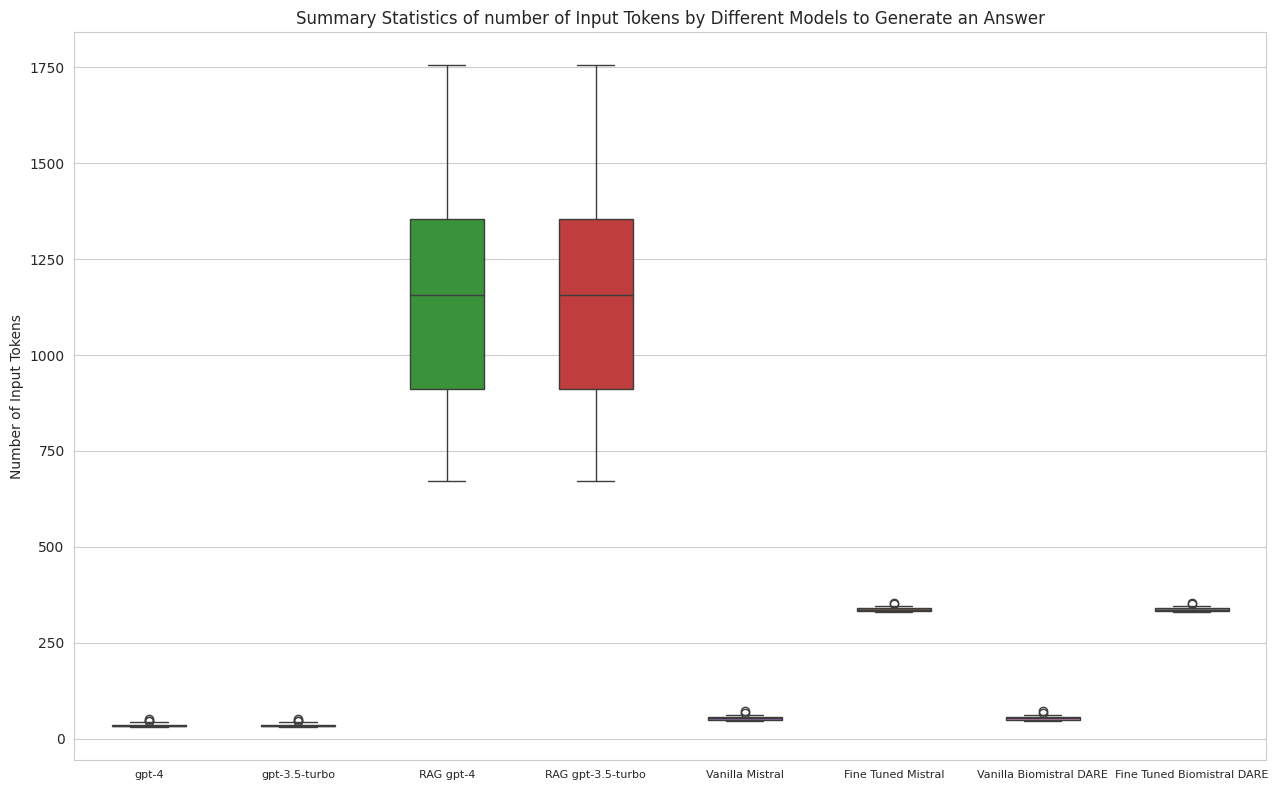

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df=ds_input_tokens[['gpt-4 input tokens',
       'gpt-3.5-turbo input tokens', 'RAG gpt-4 input tokens',
       'RAG gpt-3.5-turbo input tokens', 'Vanilla Mistral input tokens',
       'Fine Tuned Mistral input tokens',
       'Vanilla Biomistral DARE input tokens',
       'Fine Tuned Biomistral DARE input tokens']]


df.columns = [col.replace(' input tokens', '') for col in df.columns]

# Set the style of the visualization
sns.set_style("whitegrid")

# Create a new figure and a single subplot
plt.figure(figsize=(13, 8))

# Use seaborn to create the boxplots, all on one axis
sns.boxplot(data=df, width=0.5)#, showfliers=False)

# Set the title of the plot
plt.title('Summary Statistics of number of Input Tokens by Different Models to Generate an Answer')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0, fontsize=8)

# Set y-axis label
plt.ylabel('Number of Input Tokens')

# Set the y-axis limit
#plt.ylim(0, 60)

# Show the plot
plt.tight_layout()
plt.show()


### Output tokens Results

In [ ]:
import pandas as pd
output_tokens_path="/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Results/qualitative_data_questions/concat_dfs/output_tokens.csv"
ds_output_tokens=pd.read_csv(output_tokens_path)

In [ ]:
ds_output_tokens

,Qualitative benchmark question,Markscheme,gpt-4 output tokens,gpt-3.5-turbo output tokens,RAG gpt-4 output tokens,RAG gpt-3.5-turbo output tokens,Vanilla Mistral output tokens,Fine Tuned Mistral output tokens,Vanilla Biomistral DARE output tokens,Fine Tuned Biomistral DARE output tokens
0,What are the characteristics of stem cells tha...,- (stem cells) have/retain the capacity to div...,270,257,279,338,71,234,130,49
1,Can you explain a technique of gene transfer t...,- gene transfer takes a gene from one species/...,250,95,361,368,94,396,62,70
2,Can you explain the structure of the plasma me...,- phospholipid bilayer – with head and tails\n...,346,139,303,224,95,127,111,121
3,What are two factors that influence the rate o...,- (increase in) light (intensity) increases ra...,27,18,151,192,66,102,10,92
4,Can you explain the structure of a sarcomere?,- Award [1] for each structure clearly drawn a...,367,224,297,300,304,111,130,137
5,Can you explain the process of endocytosis?,- plasma membrane encloses/engulfs solid parti...,309,290,334,348,84,234,100,224
6,Can you explain the process of exocytosis with...,- vesicles carry material to plasma membrane\n...,243,164,354,254,147,293,136,100
7,Can you describe the ultrastructure of Escheri...,- Award [1] for each structure clearly drawn a...,478,389,354,322,162,501,108,162
8,How do plants perform gas exchange in the leaves?,- gases/O2 and CO2 enter/exit the leaf through...,133,92,320,129,75,79,101,82
9,Can you explain the causes and consequences of...,- burning of (fossil) fuels/coal/oil/gas relea...,275,291,435,414,78,184,137,124


In [ ]:
ds_output_tokens.columns

Index(['Qualitative benchmark question', 'Markscheme', 'gpt-4 output tokens',
       'gpt-3.5-turbo output tokens', 'RAG gpt-4 output tokens',
       'RAG gpt-3.5-turbo output tokens', 'Vanilla Mistral output tokens',
       'Fine Tuned Mistral output tokens',
       'Vanilla Biomistral DARE output tokens',
       'Fine Tuned Biomistral DARE output tokens'],
      dtype='object')

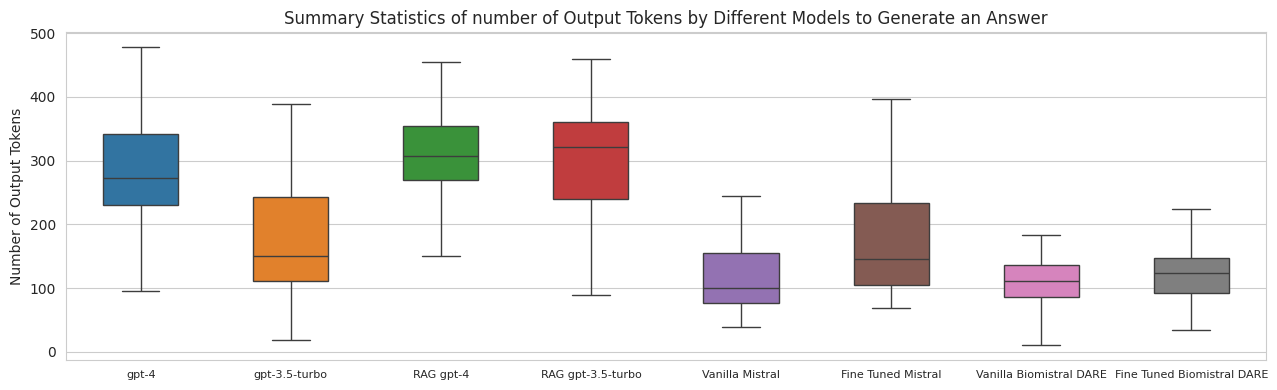

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df=ds_output_tokens[['gpt-4 output tokens',
       'gpt-3.5-turbo output tokens', 'RAG gpt-4 output tokens',
       'RAG gpt-3.5-turbo output tokens', 'Vanilla Mistral output tokens',
       'Fine Tuned Mistral output tokens',
       'Vanilla Biomistral DARE output tokens',
       'Fine Tuned Biomistral DARE output tokens']]


df.columns = [col.replace(' output tokens', '') for col in df.columns]

# Set the style of the visualization
sns.set_style("whitegrid")

# Create a new figure and a single subplot
plt.figure(figsize=(13, 4))

# Use seaborn to create the boxplots, all on one axis
sns.boxplot(data=df, width=0.5, showfliers=False)

# Set the title of the plot
plt.title('Summary Statistics of number of Output Tokens by Different Models to Generate an Answer')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0, fontsize=8)

# Set y-axis label
plt.ylabel('Number of Output Tokens')

# Set the y-axis limit
#plt.ylim(0, 60)

# Show the plot
plt.tight_layout()
plt.show()


### Time taken results

In [ ]:
import pandas as pd
time_taken_path="/content/drive/MyDrive/Arunadiss/main/Evaluation/Data/Results/qualitative_data_questions/concat_dfs/time_taken.csv"
ds_time_taken=pd.read_csv(time_taken_path)

In [ ]:
ds_time_taken.columns

Index(['Qualitative benchmark question', 'Markscheme', 'gpt-4 time taken',
       'gpt-3.5-turbo time taken', 'RAG gpt-4 time taken',
       'RAG gpt-3.5-turbo time taken', 'Vanilla Mistral time taken',
       'Fine Tuned Mistral time taken', 'Vanilla Biomistral DARE time taken',
       'Fine Tuned Biomistral DARE time taken'],
      dtype='object')

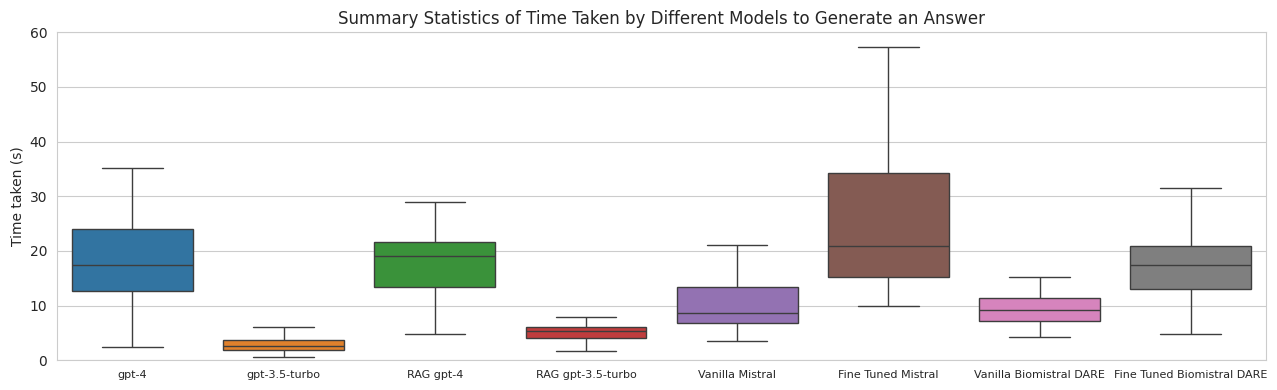

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df=ds_time_taken[['gpt-4 time taken',
       'gpt-3.5-turbo time taken', 'RAG gpt-4 time taken',
       'RAG gpt-3.5-turbo time taken', 'Vanilla Mistral time taken',
       'Fine Tuned Mistral time taken', 'Vanilla Biomistral DARE time taken',
       'Fine Tuned Biomistral DARE time taken']]

df.columns = [col.replace(' time taken', '') for col in df.columns]

# Set the style of the visualization
sns.set_style("whitegrid")

# Create a new figure and a single subplot
plt.figure(figsize=(13, 4))


# Use seaborn to create the boxplots, all on one axis
sns.boxplot(data=df, showfliers=False)#, width=0.5)

# Set the title of the plot
plt.title('Summary Statistics of Time Taken by Different Models to Generate an Answer')


plt.xticks(rotation=0, fontsize=8)

# Set y-axis label
plt.ylabel('Time taken (s)')

# Set the y-axis limit
plt.ylim(0, 60)

# Show the plot
plt.tight_layout()
plt.show()
